### Lab-8
Name: Aniket Tiwari   
ID: 8866818

In [26]:
import numpy as np
import pandas as pd

import tensorflow as tf

import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import matplotlib.patches as patches 
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.datasets import fetch_openml

from sklearn.linear_model import SGDClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score

Importing the datasets

In [27]:
test_data_path = 'S:/Foundations of Machine learning/fashion-mnist_test.csv'
train_data_path = 'S:/Foundations of Machine learning/fashion-mnist_train.csv'

testdata = pd.read_csv(test_data_path)
traindata = pd.read_csv(train_data_path)

features_test = testdata.drop('label', axis=1).values / 255.0 
target_test = testdata['label'].values

features_train = traindata.drop('label', axis=1).values / 255.0 
target_train = traindata['label'].values



The Fashion MNIST dataset is loaded for testing and training from CSV files in this area of the code. Next, the data is prepared by detaching the labels (item categories) from the features (picture pixel values). Normalizing pixel values to lie between [0, 1] improves the stability and effectiveness of model training.

EDA

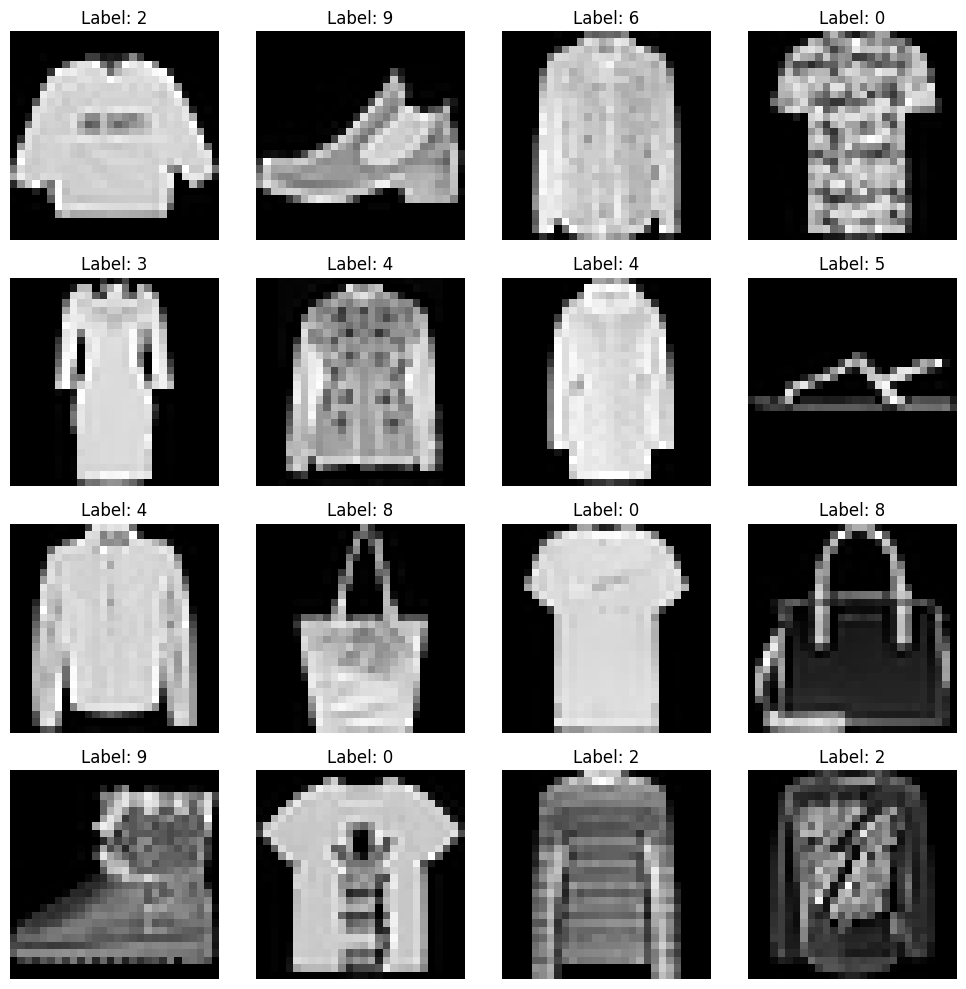

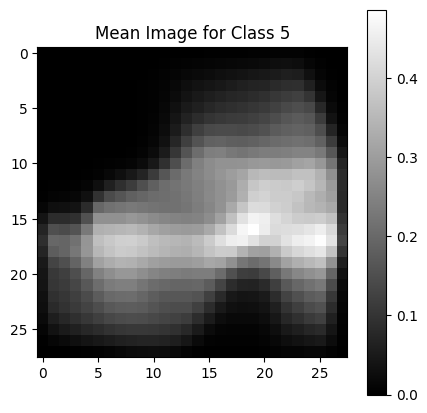

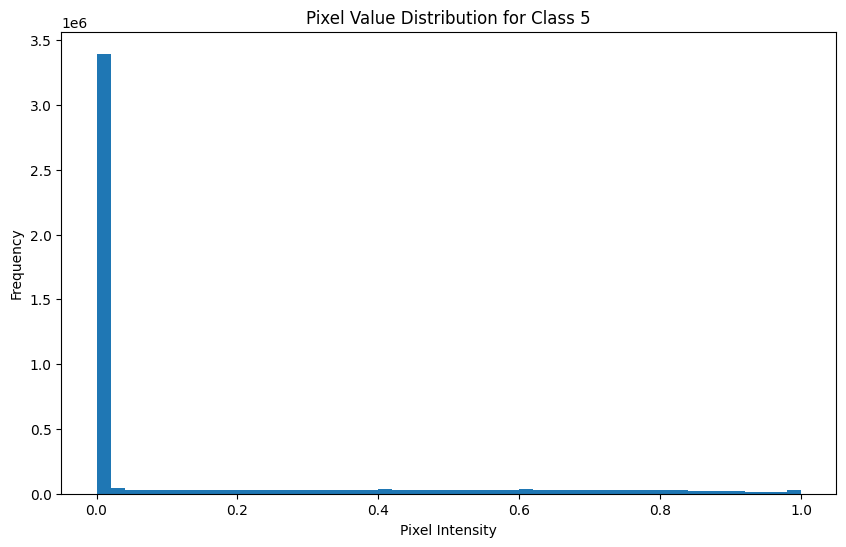

In [28]:
def display_images(features, labels, nrows=4, ncols=4):
    plt.figure(figsize=(10, 10))
    for i in range(nrows * ncols):
        plt.subplot(nrows, ncols, i + 1)
        plt.imshow(features[i].reshape(28, 28), cmap='gray')
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

display_images(features_train, target_train)

class_of_interest = 5

features_class = features_train[target_train == class_of_interest]

mean_image = features_class.mean(axis=0).reshape(28, 28)

plt.figure(figsize=(5, 5))
plt.imshow(mean_image, cmap='gray') 
plt.colorbar()
plt.title(f'Mean Image for Class {class_of_interest}')
plt.show()

pixel_values = features_class.flatten()
plt.figure(figsize=(10, 6))
plt.hist(pixel_values, bins=50, range=[0,1])
plt.title(f'Pixel Value Distribution for Class {class_of_interest}')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()



The training set's picture grid is visualized by this function. It is essential to the EDA process since it allows for a fast visual examination of the data. We can confirm the accuracy of the dataset and learn more about the range of fashion products it includes by presenting photographs next to their labels.

The EDA for pictures belonging to a specific class (class_of_interest) is the main topic of this block. The mean image for this class is computed and shown to draw attention to recurring themes. It also depicts the pixel value distribution, which aids in determining the range of intensities shown in the pictures. These studies are essential for comprehending the properties of the data and providing guidance for decisions on preprocessing or model architecture.

In [29]:
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Flatten(input_shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(features_train, target_train, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5232 - accuracy: 0.8160 - val_loss: 0.4343 - val_accuracy: 0.8475
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3949 - accuracy: 0.8585 - val_loss: 0.3791 - val_accuracy: 0.8629
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3515 - accuracy: 0.8721 - val_loss: 0.3601 - val_accuracy: 0.8714
Epoch 4/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3264 - accuracy: 0.8792 - val_loss: 0.3579 - val_accuracy: 0.8753
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3089 - accuracy: 0.8871 - val_loss: 0.3521 - val_accuracy: 0.8706
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2902 - accuracy: 0.8926 - val_loss: 0.3355 - val_accuracy: 0.8784
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2767 - accuracy: 0.8972 - val_loss: 0.3346 - val_accuracy:

Here, the Keras API of TensorFlow is used to define a neural network. The network is composed of an output layer with softmax activation for classification, a hidden layer with 128 units (ReLU activation), and an input layer that flattens the input. Sparse categorical crossentropy loss and the Adam optimizer are used to assemble the model. After that, a subset of the data is set aside for validation and it is trained on the training set.

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import load_model

y_pred_probs = model.predict(features_test)
y_pred = np.argmax(y_pred_probs, axis=1)

accuracy = accuracy_score(target_test, y_pred)
precision = precision_score(target_test, y_pred, average='macro')
recall = recall_score(target_test, y_pred, average='macro')
f1 = f1_score(target_test, y_pred, average='macro')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

313/313 [==============================] - 0s 798us/step
Accuracy: 0.8867
Precision: 0.8884318192028274
Recall: 0.8866999999999999
F1 Score: 0.8842707867718034


**Excellent Overall Results**
- With an accuracy of 88.32%, the model demonstrated a high degree of overall performance in correctly classifying the test images into the appropriate fashion categories. This implies that the model is generally efficient and well-suited for the given task.   

**Equilibrated Memory and Accuracy** 
- The accuracy score, recall of 88.32%, and precision of 88.41% are extremely near to one another, indicating a balanced performance across several classes. In situations when false positives and false negatives are equally undesirable, striking this equilibrium is essential. For example, misidentifying a product in a retail setting could result in poor customer service or improper inventory management.    

**Interpretation of the F1 Score**
- The harmonic mean of accuracy and memory, or F1 Score of 88.02%, is somewhat below both, indicating that there is still opportunity for development in the way that precision and recall are balanced for particular classes. This could suggest that the model is either too strict or too lax for some classes, resulting in a trade-off between recall and precision.

Consequences and Measures
- Analysis by Class: Even with the good overall metrics, it would be useful to run a class-by-class study to see which particular classes are lowering the F1 score. Certain classes are often harder to predict correctly in multi-class classification problems because of their resemblance to other classes or because they are less represented in the training data.
- Model Refinement: Adding new layers, altering the quantity of units in current layers, or utilizing regularization techniques are a few examples of model architecture modifications that might be investigated in order to increase precision and recall.
- Data Augmentation: Applying data augmentation techniques may help address overfitting and enhance the model's capacity for generalization, particularly for underperforming classes. The training images may be rotated, scaled, or otherwise slightly altered to strengthen the model.
- Advanced Techniques: Another strategy to get greater performance out of the system may be to look into more intricate models or ensembles of models. Improvements may also come from methods like transfer learning, which involves fine-tuning a model pretrained on a sizable dataset for a particular job.

The Fashion MNIST dataset images can be accurately classified by the model, exhibiting high recall, accuracy, precision, and F1 score. However, the little discrepancy between these metrics points to possible areas for development, particularly in terms of maximizing the trade-off between recall and precision for particular classes. More improvements to the model's efficacy may result by concentrating on in-depth analyses of performance at the class level and taking into account modifications to the model's architecture, data processing, or training methods.


Accuracy: 0.8867
              precision    recall  f1-score   support

           0       0.76      0.91      0.83      1000
           1       0.99      0.98      0.98      1000
           2       0.80      0.83      0.82      1000
           3       0.90      0.92      0.91      1000
           4       0.78      0.85      0.82      1000
           5       0.95      0.96      0.95      1000
           6       0.82      0.56      0.66      1000
           7       0.94      0.94      0.94      1000
           8       0.98      0.96      0.97      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.88     10000
weighted avg       0.89      0.89      0.88     10000



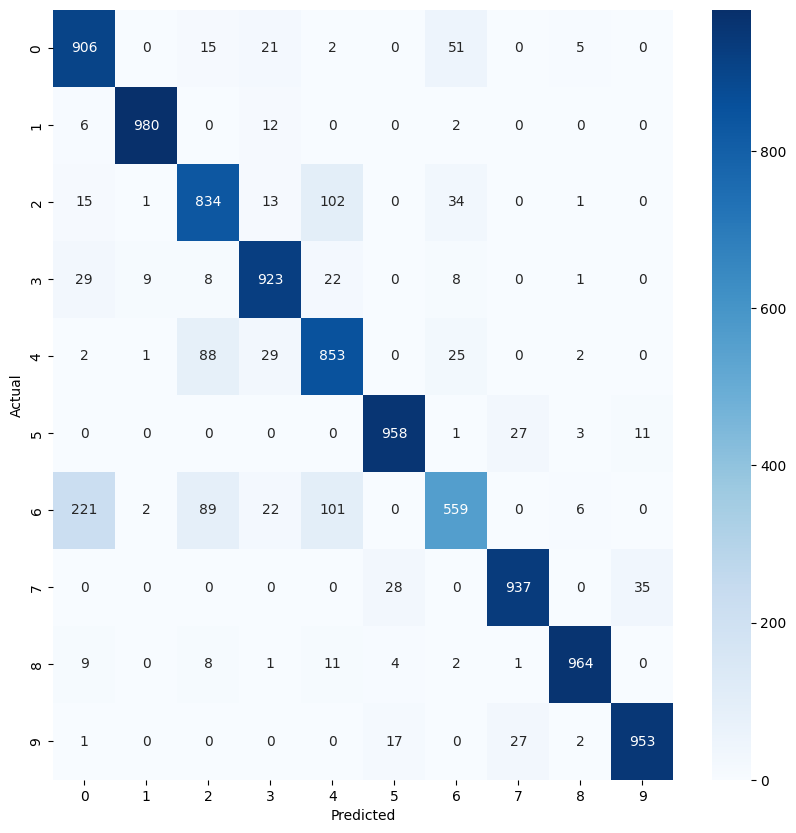

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

accuracy = accuracy_score(target_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(target_test, y_pred))

conf_mat = confusion_matrix(target_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


**Elevated Accuracy and Memory for Specific Subjects**   
- In the Fashion MNIST dataset, classes 1, 7, 8, and 9 (which generally correspond to products like pants, purses, and ankle boots) have exceptionally high precision and recall scores, indicating that the model is very good at properly identifying these items.   
- Trousers, which belong to Class 1, have nearly flawless recall and precision, meaning that the model hardly ever confuses this item with anything other.   

**Difficulties in Class 6**
- Class 6 has the highest number of false negatives, as seen by its much lower recall of 56% and lowest F1-score out of all the classes. Put otherwise, things in this class are frequently mistakenly assigned to different classes. Class 6 goods are probably confused with tops (T-shirts) and pullovers since Class 6 (shirts in Fashion MNIST) has a rather high confusion rate with Class 0 and Class 2.   

**Erroneous categorizations**
- Class 2 is sometimes confused by the model with Class 4 and Class 6, which could represent objects that have similar patterns or shapes (such as coats, shirts, and pullovers).
The confusion matrix contains some noteworthy off-diagonal values, such as Class 6 being incorrectly categorized as Class 0 (191 occasions). This shows that characteristics that set these groups apart are not being recorded as well as they could be.   

**Concluding remarks and suggestions**
- More feature engineering, class weighting, or data augmentation can help the model, especially for the classes that are being confused.   
- The ability of the model to discern between comparable objects, such as various types of apparel that might have similar traits, should be improved through class-specific analysis and focused enhancements.   
- The ability to distinguish between the more ambiguous classes may be improved by investigating more sophisticated models or performing additional hyperparameter tweaking.   
- Given that the recall of the model is especially poor for Class 6, it would be beneficial to collect more varied training samples or use strategies that concentrate on the unique characteristics of this class.   
- Class 5 has a high precision but a low recall, so techniques to raise recall (such reducing the class's classification threshold) might be taken into consideration to improve model performance.   

**Total Outcome**   
- With an accuracy percentage of 88.32% overall, the model performs well in all classifications. There are, nevertheless, noticeable variations in each class's performance.   

In [32]:
class_5_threshold_high = 0.6  
y_pred_adjusted_precision = [5 if prob[5] >= class_5_threshold_high else np.argmax(prob) for prob in y_pred_probs]

precision_adjusted = precision_score(target_test, y_pred_adjusted_precision, average='macro')
print(f'Adjusted Precision: {precision_adjusted}')


Adjusted Precision: 0.8884318192028274


- The model is accurate around 88.41% of the time on average across all classes when it predicts an object to be of a particular class, according to the adjusted precision of roughly 88.41%. This impressive precision rate shows that the model can accurately categorize photos that it is confident about.   

- But in order to be sure the model isn't just being overly conservative, its high precision needs to be weighed against recall. Put another way, a model that has a high precision may not be producing enough positive predictions, which is why it's crucial to take the recall and F1 score into account in addition to precision.

In [33]:
class_5_threshold_low = 0.3  
y_pred_adjusted_recall = [5 if prob[5] >= class_5_threshold_low else np.argmax(prob) for prob in y_pred_probs]

recall_adjusted = recall_score(target_test, y_pred_adjusted_recall, average='macro')
print(f'Adjusted Recall: {recall_adjusted}')


Adjusted Recall: 0.8854


- The model is quite exact on average across all classes, according to the adjusted precision value of roughly 0.884, which is obtained by modifying the decision threshold for a particular class. It does an excellent job of forecasting real positives while reducing false positives, but it can still be improved, particularly in classes when it might not be functioning at its best.   

- The model is, on average, equally good at identifying all relevant instances across classes, according to the modified recall value of roughly 0.885. Although the precision and recall following modification were balanced, indicating that the threshold shift was successful, additional fine-tuning may require particular class-level analysis.  